<a href="https://colab.research.google.com/github/minhbao1705/pytorch_tutorial/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

# Set hyper-params

In [2]:
input_size = 1
output_size = 1
num_epochs = 10
learning_rate = 0.001

# Create dataset

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Create linear model

In [4]:
model = nn.Linear(input_size, output_size)

# Loss and optimizer

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

# Train model

In [6]:
for epoch in range(num_epochs):
  # Chuyển numpy array sang torch tensor
  inputs = torch.from_numpy(x_train)
  targets = torch.from_numpy(y_train)

  # lan truyền tới
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # lan truyền ngược
  optimizer.zero_grad()
  loss.backward()

  # optimizer
  optimizer.step()

  # Hiển thị thông tin huấn luyện
  if (epoch)%1 == 0:
    print("Epoch: {}/{}, Loss: {}".format(epoch, num_epochs, loss.item()))

Epoch: 0/10, Loss: 1.7727901935577393
Epoch: 1/10, Loss: 1.5280840396881104
Epoch: 2/10, Loss: 1.3238238096237183
Epoch: 3/10, Loss: 1.1533229351043701
Epoch: 4/10, Loss: 1.0110002756118774
Epoch: 5/10, Loss: 0.892196774482727
Epoch: 6/10, Loss: 0.7930244207382202
Epoch: 7/10, Loss: 0.7102377414703369
Epoch: 8/10, Loss: 0.6411272287368774
Epoch: 9/10, Loss: 0.5834321975708008


# Predict

In [8]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()

# Visualization

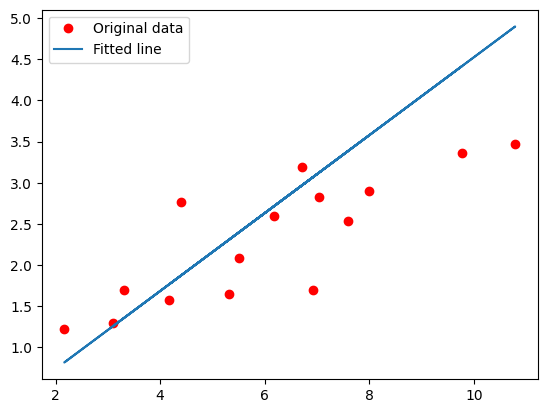

<Figure size 640x480 with 0 Axes>

In [9]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()
plt.savefig("fig_plot.jpg")

# Save model

In [11]:
torch.save(model.state_dict(), 'linear_model.ckpt')